In [14]:
import sys, time, timeit, cProfile, pstats, importlib, os, re, itertools
sys.path.insert(0,'/home/uq/apps/muq2inst/lib')

import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
import numpy as np

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import matplotlib
%matplotlib notebook
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (40., 7.)
matplotlib.rcParams.update({'font.size': 22})

%load_ext autoreload
%autoreload 2

from Database import *
from Densities import *
from MultiIndex import *
from Surrogates import *
from Transport import *

import plotutil, randutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
mean = np.array([[-0.82910471], [0.10852764]])
cova = np.array([[0.01714955, 0.0176695], [0.0176695, .02852501]])

tt = Gaussian(mean=mean, cova=cova)
mm = TotalDegreeSet(dim=2, k=15)
ss = Legendre(multis=mm, target=tt, method='wls')

Surrogate... Done


In [19]:
rr = TransportMap(ss)
pp = randutil.points(2,10000)
ii = np.zeros(pp.shape)
for j in range(pp.shape[1]) :
    ii[:,j] = rr.inveval(pp[:,j])

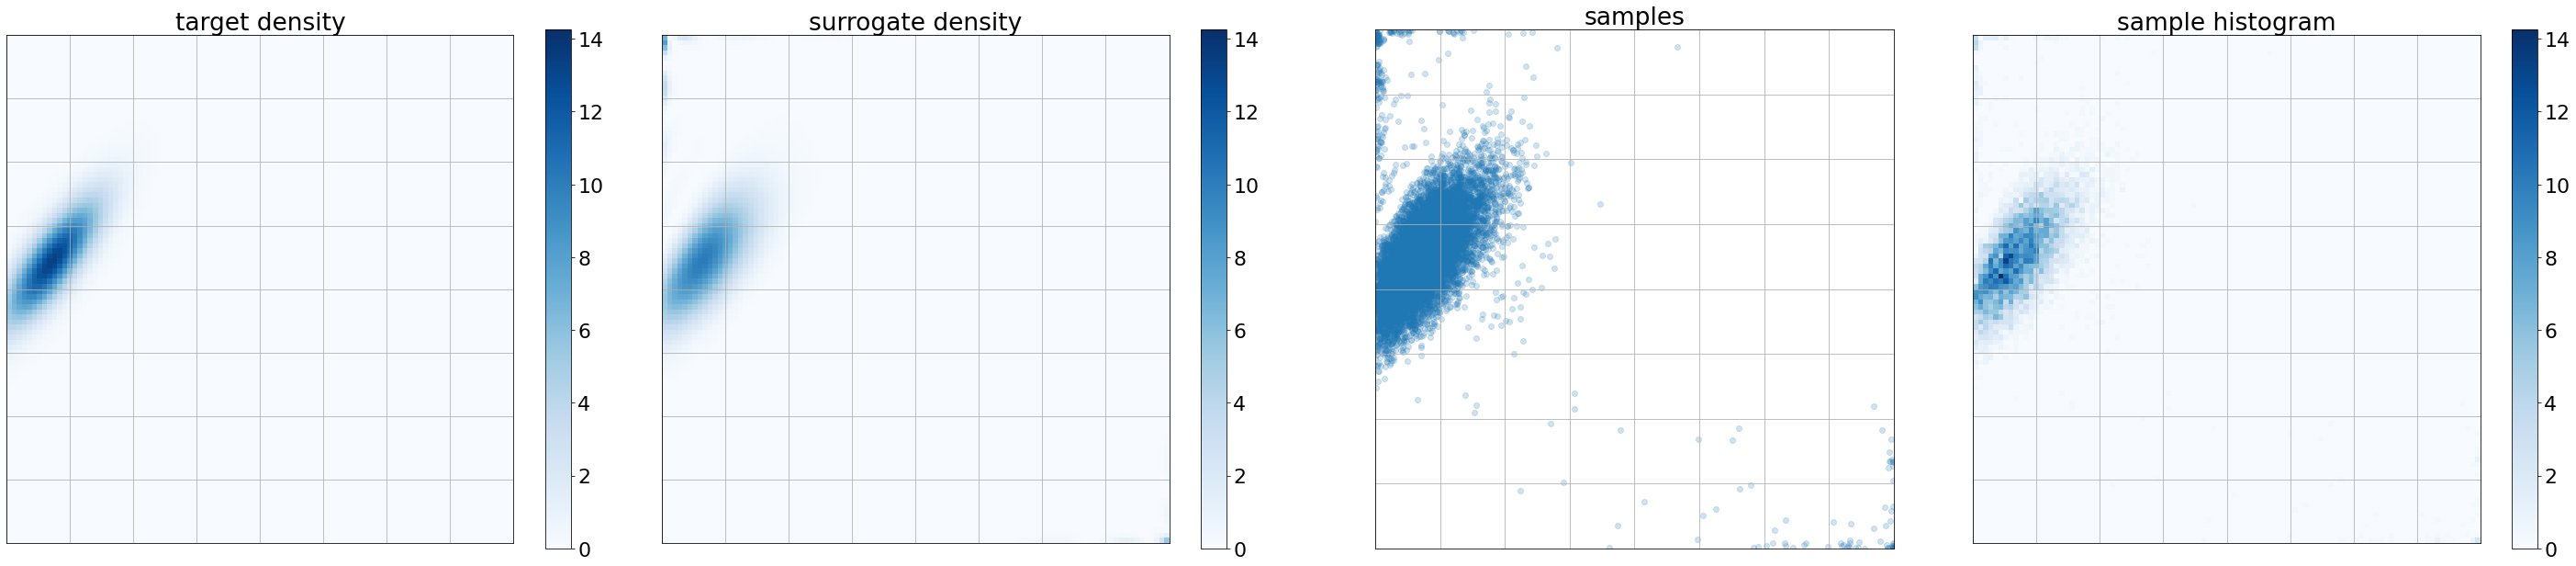

In [98]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

ZZtar = tt.eval(pts).reshape((len(x), len(x)))
ZZtar /= np.sum(ZZtar) * 4/len(x)**2
ZZsur = ss.eval(pts).reshape((len(x), len(x)))
ZZsur /= np.sum(ZZsur) * 4/len(x)**2
ZZsam, _, _ = np.histogram2d(ii[1], ii[0], bins=100, density=True, range=[[-1,1], [-1,1]])

vmax = max(np.max(ZZtar), np.max(ZZsur), np.max(ZZsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#cs = ax.contourf(X, Y, ZZtar, levels=[-1, 0, .1, 1, 10, 100], norm=colors.LogNorm())
cs = ax.imshow(ZZtar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
fig.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
#cs = ax.contourf(X, Y, ZZsur)#, levels=cs.levels)
cs = ax.imshow(ZZsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(ii[1], ii[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(ZZsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

In [39]:

t = Rosenbrock(a=.5, b=10)
m = TotalDegreeSet(dim=2, k=30)
s = Legendre(multis=m, target=t, method='wls')
r = TransportMap(s)

setup TotalDegreeSet


In [40]:
p = randutil.points(2,20000)
i = np.zeros(p.shape)
for j in range(p.shape[1]) :
    i[:,j] = r.inveval(p[:,j])

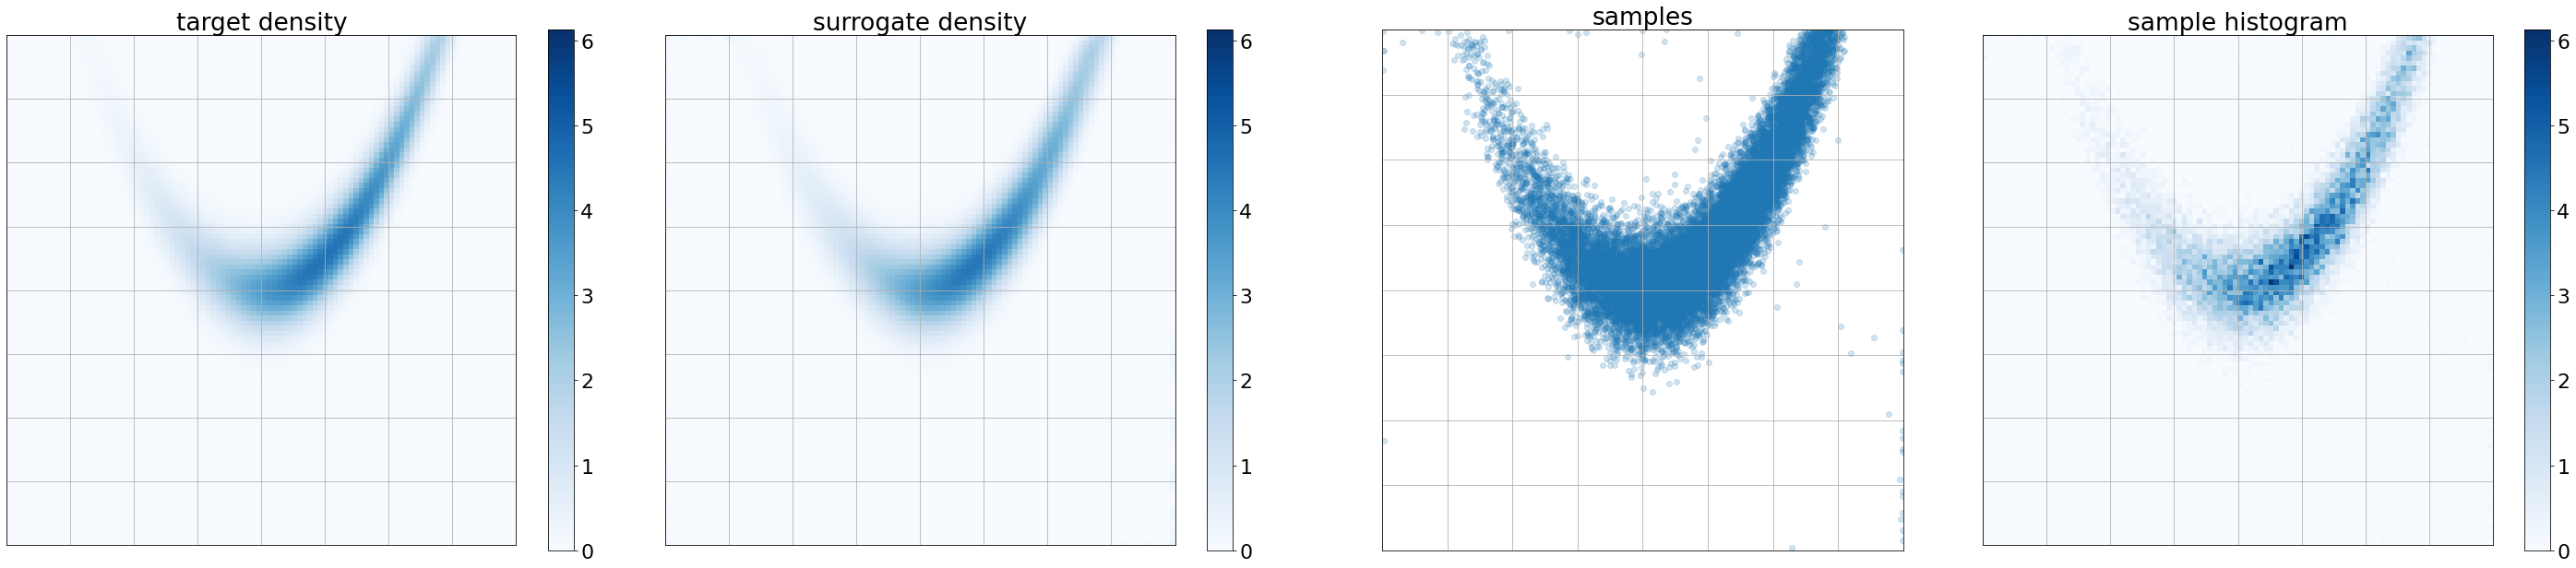

In [42]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
Zsam, _, _ = np.histogram2d(i[1], i[0], bins=100, density=True, range=[[-1,1], [-1,1]])

vmax = max(np.max(Ztar), np.max(Zsur), np.max(Zsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(i[1], i[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

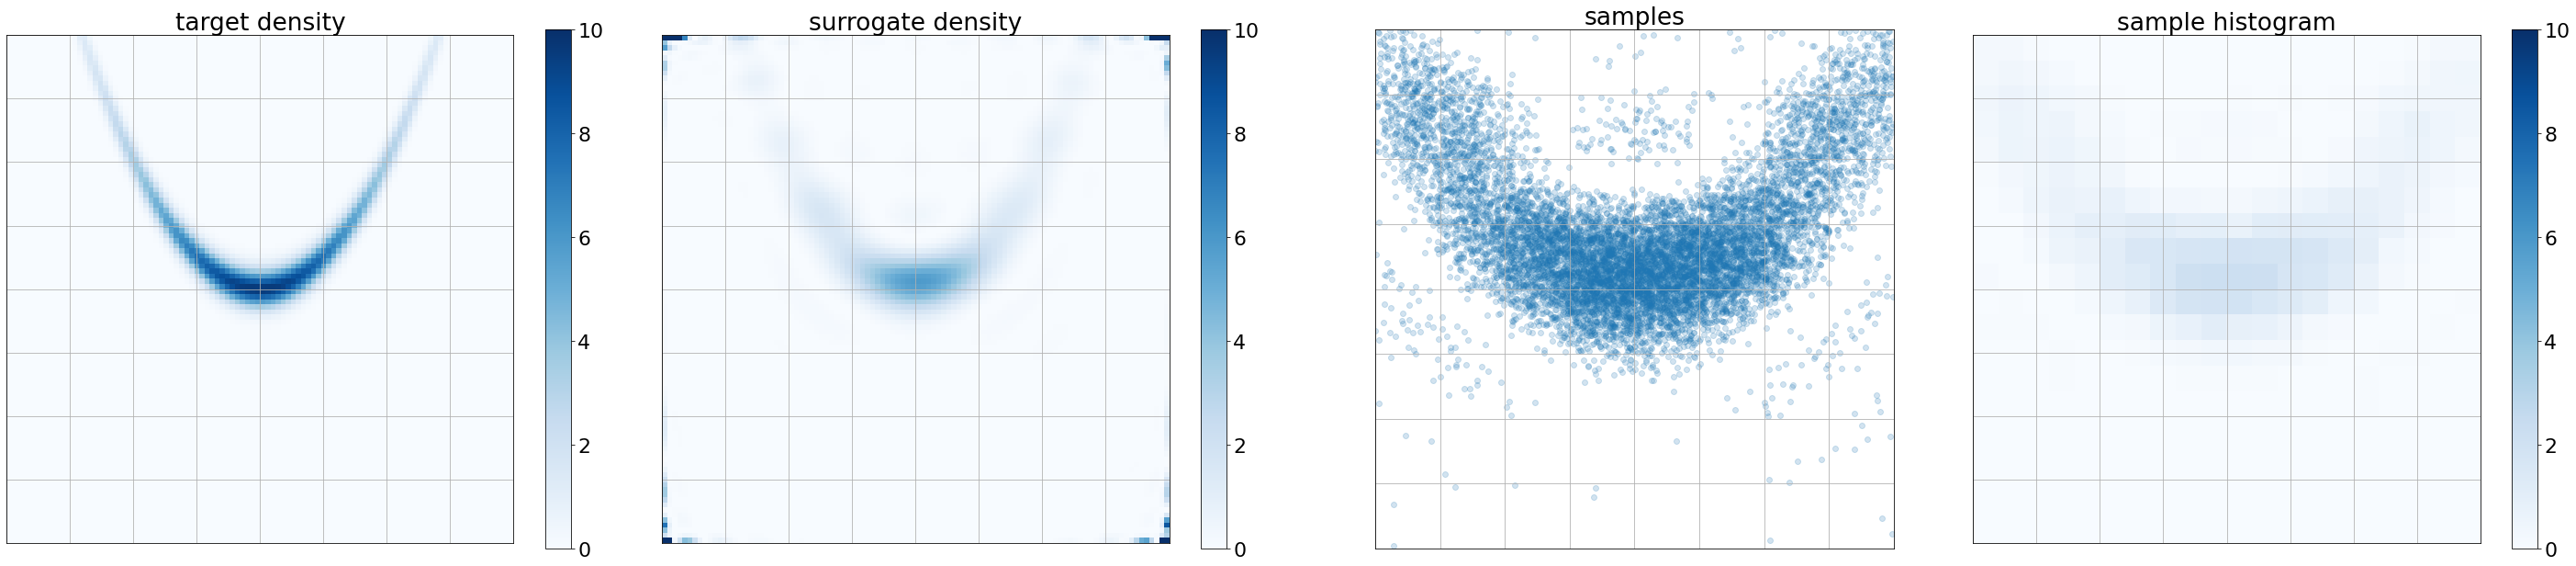

In [18]:
x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
Zsam, _, _ = np.histogram2d(i[1], i[0], bins=20, density=True, range=[[-1,1], [-1,1]])

vmax = 10 # max(np.max(Ztar), np.max(Zsur), np.max(Zsam))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 3, xlabel='', title='samples')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
ax.scatter(i[1], i[0], alpha=.2)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])

ax = plotutil.get_ax(fig, 4, 4, xlabel='', title='sample histogram')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsam.T, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

setup TotalDegreeSet


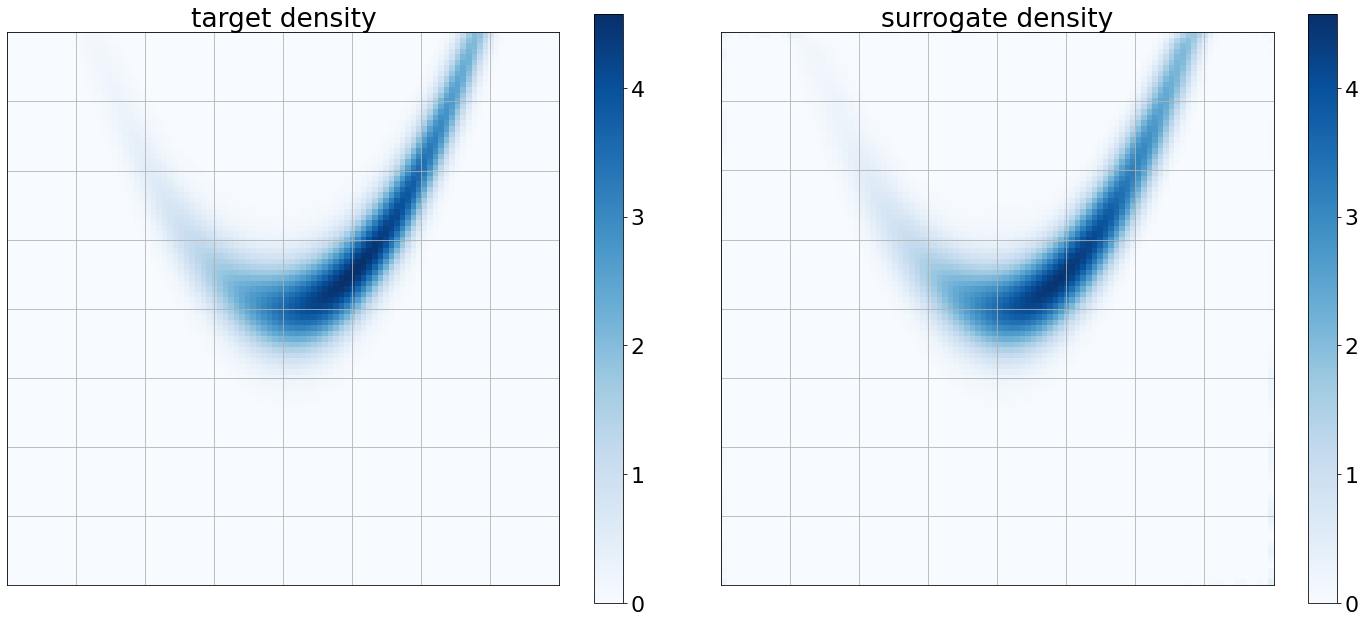

In [38]:
#t = Rosenbrock(a=-.21, b=10)
#m = TotalDegreeSet(dim=2, k=30)
#s = Legendre(multis=m, target=t, method='wls')

t = Rosenbrock(a=.5, b=10)
m = TotalDegreeSet(dim=2, k=30)
s = Legendre(multis=m, target=t, method='wls')

x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2

vmax = np.max(Ztar)# max(np.max(Ztar), np.max(Zsur))
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmin=0, vmax=vmax, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

setup TotalDegreeSet
Surrogate... Done


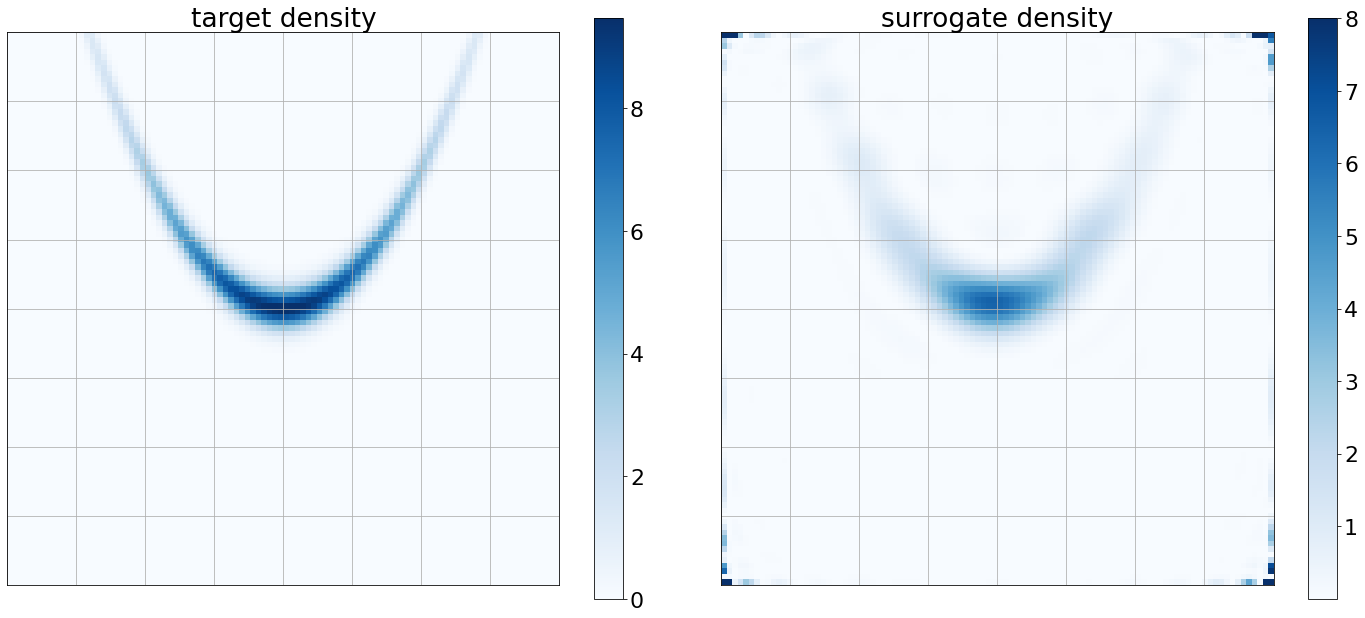

In [29]:
t = Rosenbrock(a=0, b=50)
m = TotalDegreeSet(dim=2, k=23)
s = Legendre(multis=m, target=t, method='wls')

x = np.linspace(-1,1,100)
X, Y = np.meshgrid(x, x)
pts = np.vstack((X.flatten(), Y.flatten()))

Ztar = t.eval(pts).reshape((len(x), len(x)))
Ztar /= np.sum(Ztar) * 4/len(x)**2
Zsur = s.eval(pts).reshape((len(x), len(x)))
Zsur /= np.sum(Zsur) * 4/len(x)**2
cmap = 'Blues'

fig = plt.figure(figsize=(40,9))
ax = plotutil.get_ax(fig, 4, 1, xlabel='', title='target density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Ztar, extent=[-1,1,-1,1], origin='lower', cmap=cmap)
plt.colorbar(cs)

ax = plotutil.get_ax(fig, 4, 2, xlabel='', title='surrogate density')
ax.set_aspect('equal', 'box')
plt.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
cs = ax.imshow(Zsur, extent=[-1,1,-1,1], origin='lower', vmax=8, cmap=cmap)
plt.colorbar(cs)

plt.tight_layout()
plt.show()

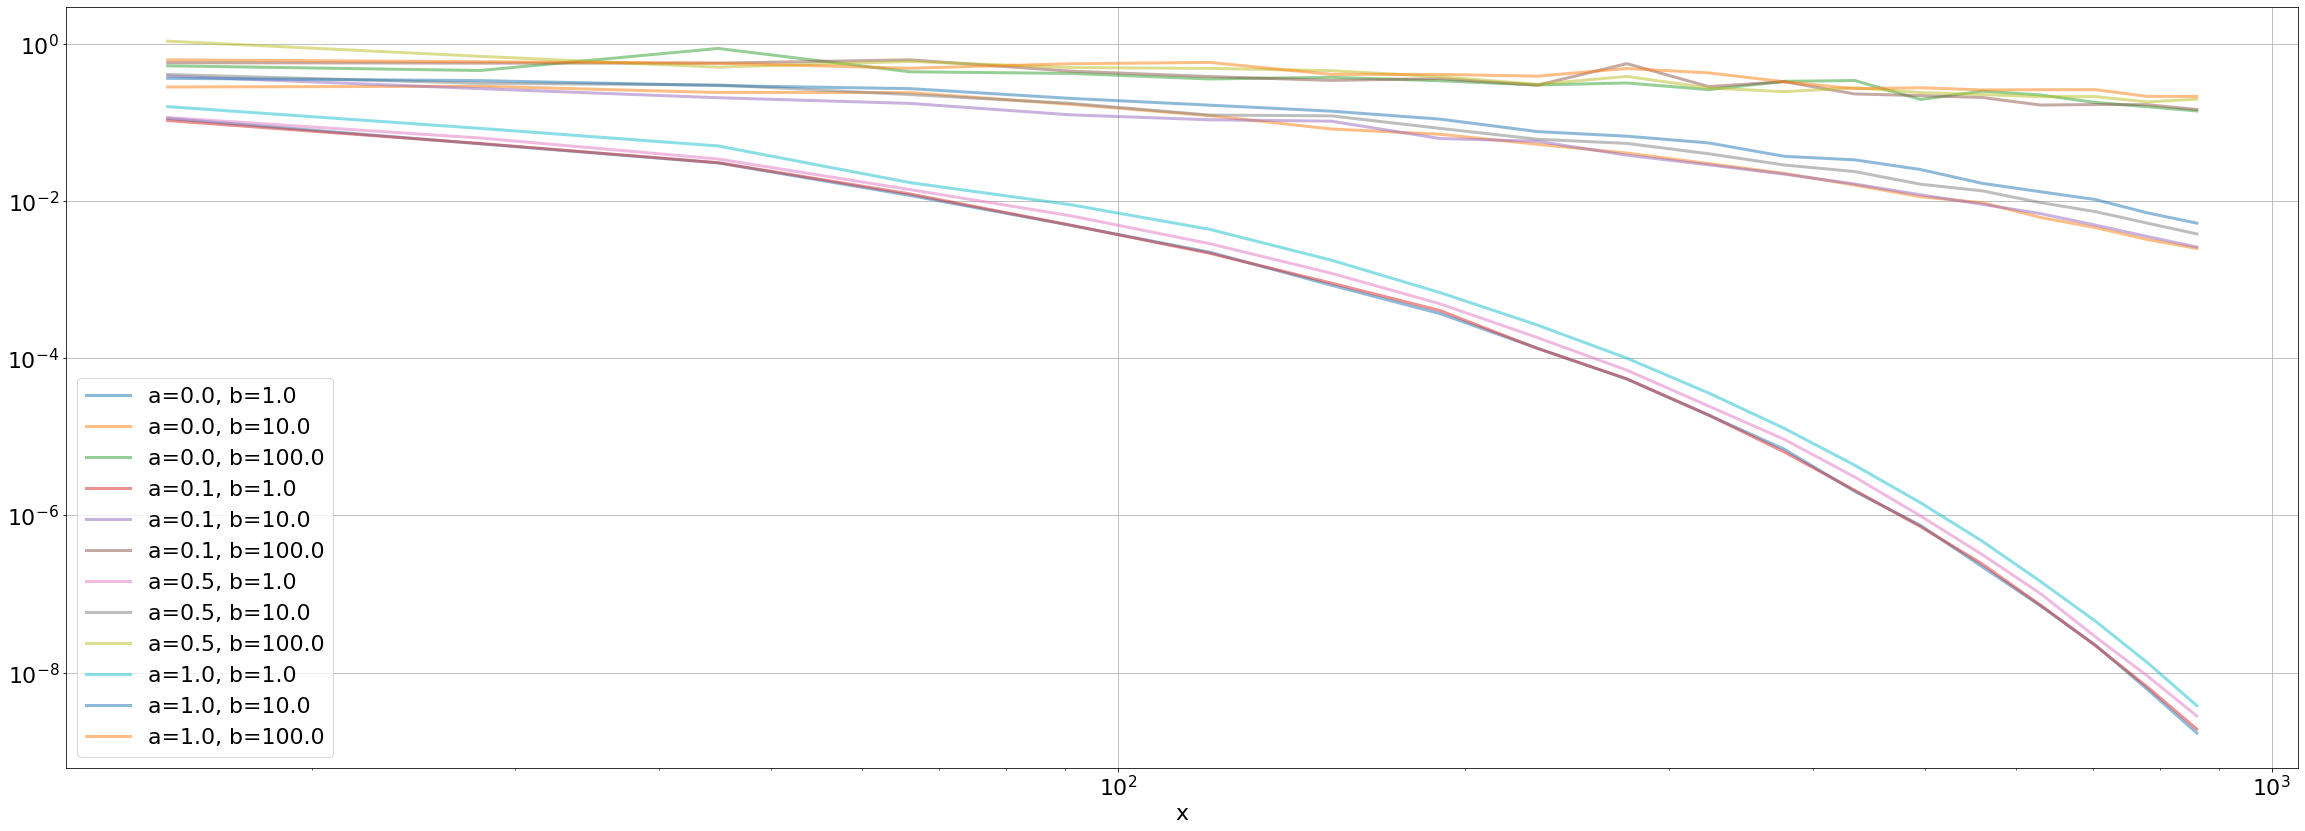

In [26]:
query = """
select ros.id, ros.a, ros.b, mul.size, evl.l2dist
  from surrogateevaldbo as evl
  join surrogatedbo as sur
    on evl.surrog_id = sur.id
  join rosenbrockdbo as ros 
    on sur.target_id = ros.id
   and sur.target = 'banana'
  join multiindexsetdbo as mul
    on sur.multis_id = mul.id
"""


ax = plotutil.get_ax(plt.figure(figsize=(40., 14.)), 1, 1, logaxis=['x', 'y'])

cursor = DB.execute_sql(query.format(d))
col_names = [col[0] for col in cursor.description] 
res = sorted([dict(zip(col_names, row)) for row in cursor.fetchall()], key=lambda x : x['id'])

for k, g in itertools.groupby(res, lambda x : x['id']) :
    data = np.array([[r['size'], r['l2dist'], r['a'], r['b']] for r in sorted(g, key=lambda x :  x['size']) if r['l2dist'] is not None])
    try :
        if len(data) > 0 :
            ax.plot(data[:, 0], data[:, 1], lw=3, alpha=.5, label='a={}, b={}'.format(set(data[:,2]).pop(),  set(data[:,3]).pop()))
    except IndexError :
        print(d, data)
    
ax.legend()
plt.show()